# Business Intelligence and Analytics

### Digital Assignment- Customer Churn Prediction

Sonali Shripad Shanbhag (19BDS0114)

## 1. Import required libraries and packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## 2. Read the dataset

In [2]:
dataset=pd.read_csv("C:\\Users\\sonali\\Desktop\\Sem 6\\C2- Business Intelligence and Analytics\\Churn Modelling.csv")

In [3]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 3. Exploratory Data Visualization

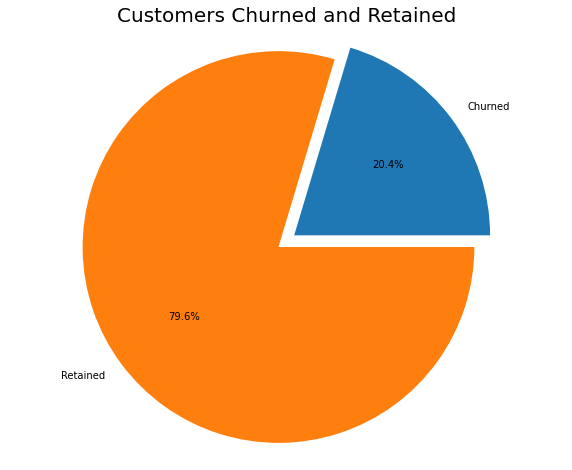

In [4]:
labels = 'Churned', 'Retained'
sizes = [dataset.Exited[dataset['Exited']==1].count(), dataset.Exited[dataset['Exited']==0].count()]
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=(0, 0.1), labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Customers Churned and Retained", size = 20)
plt.show()

### i. Categorical Data

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

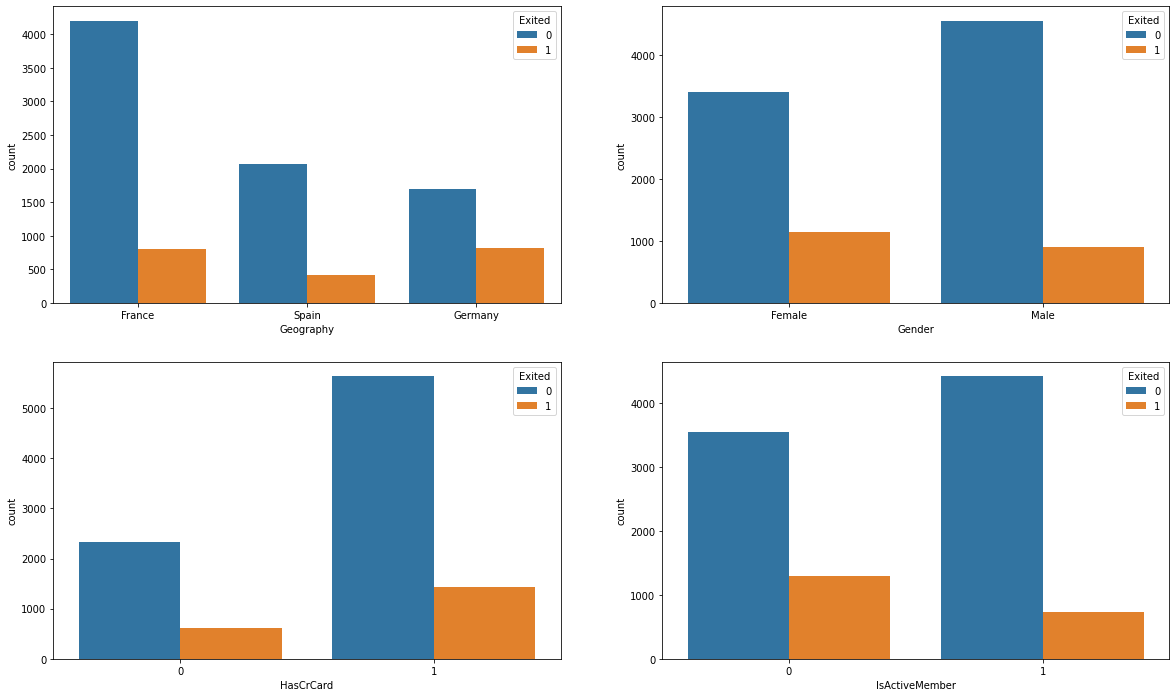

In [5]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

#### Inferences: 
- The proportion of churned customers is inversely related to the population of customers, which might imply insufficient customer services/relation management.
- Female customer churn is greater than male customer churn.
- Majority of the customers that churned are those with credit cards. 
- Inactive members have a greater churn. 

### ii. Continuous Data

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

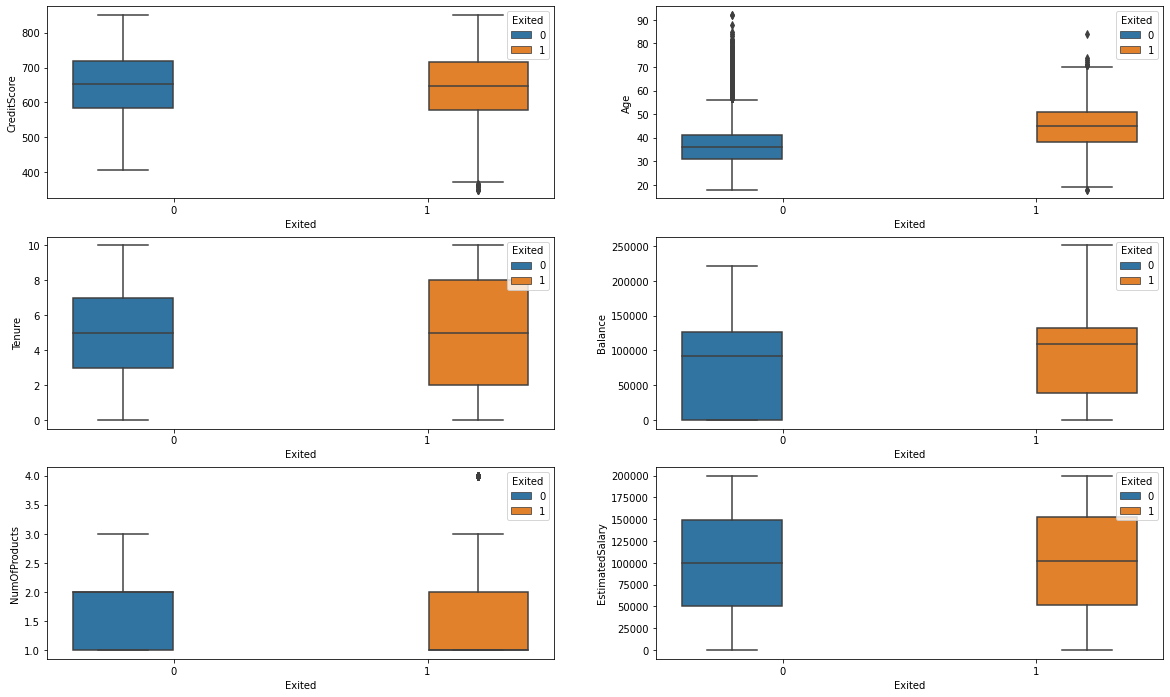

In [6]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = dataset , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][1])

#### Inferences: 

- There is no significant difference in the credit score distribution between retained and churned customers.
- The older customers are churning more than the younger ones.
- The clients who spent little time/a lot of time with the bank are more likely to churn compared to those that are of average tenure.
- The bank is losing customers with greater bank balance.
- Neither the product nor the salary has a significant effect on the likelihood to churn.

## 4. Data Pre-processing

#### i. Remove unnecessary columns

In [7]:
dataset = dataset.drop(dataset.columns[[0, 1, 2]], axis=1) 

#### ii. Label encode the categorical columns

In [8]:
le=LabelEncoder()
dataset['Geography']=le.fit_transform(dataset['Geography'])
dataset['Gender']=le.fit_transform(dataset['Gender'])

#### iii. Split into dependent and independent variables

In [9]:
x = dataset.iloc[:,0:10].values
y = dataset.iloc[:,10].values

#### iv. Normalize continuous variables using Standard Scaler

In [10]:
sc = StandardScaler()
x = sc.fit_transform(x)

#### v. Split into train and test sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 10)
(3000, 10)
(7000,)
(3000,)


## 5. Apply ML Algorithms

### Logistic Regression

In [13]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_ypred=lr.predict(x_test)
lr_acc = sklearn.metrics.accuracy_score(lr_ypred,y_test)
print("Logistic Regression Accuracy: ")
print(lr_acc*100,"%")

Logistic Regression Accuracy: 
80.30000000000001 %


### Naive Bayes

In [14]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_ypred=nb.predict(x_test)
nb_acc = sklearn.metrics.accuracy_score(nb_ypred,y_test)
print("Naive Bayes Accuracy: ")
print(nb_acc*100,"%")

Naive Bayes Accuracy: 
82.13333333333334 %


### Stochastic Gradient Descent

In [15]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True, random_state=15)
sgd.fit(x_train,y_train)
sgd_ypred=sgd.predict(x_test)
sgd_acc = sklearn.metrics.accuracy_score(sgd_ypred,y_test)
print("Stochastic Gradient Descent Accuracy: ")
print(sgd_acc*100,"%")

Stochastic Gradient Descent Accuracy: 
78.0 %


### K-Nearest Neighbours

In [16]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_ypred=knn.predict(x_test)
knn_acc = sklearn.metrics.accuracy_score(knn_ypred,y_test)
print("K-Nearest Neighbour Accuracy: ")
print(knn_acc*100,"%")

K-Nearest Neighbour Accuracy: 
82.56666666666666 %


### Decision Tree

In [17]:
dtree=DecisionTreeClassifier(max_depth=100,random_state=10,max_features=None, min_samples_leaf=100)
dtree.fit(x_train,y_train)
dtree_ypred=dtree.predict(x_test)
dtree_acc = sklearn.metrics.accuracy_score(dtree_ypred,y_test)
print("Decision Tree Accuracy: ")
print(dtree_acc*100,"%")

Decision Tree Accuracy: 
84.3 %


### Random Forest

In [18]:
rfm=RandomForestClassifier(n_estimators=200,oob_score=True,n_jobs=-1, random_state=20,max_features=None,min_samples_leaf=2)
rfm.fit(x_train,y_train)
rfm_ypred=rfm.predict(x_test)
rfm_acc = sklearn.metrics.accuracy_score(rfm_ypred,y_test)
print("Random Forest Accuracy: ")
print(rfm_acc*100,"%")

Random Forest Accuracy: 
86.36666666666667 %


### Support Vector Machine

In [19]:
svm=SVC(kernel="linear",C=0.025,random_state=None)
svm.fit(x_train,y_train)
svm_ypred=svm.predict(x_test)
svm_acc = sklearn.metrics.accuracy_score(svm_ypred,y_test)
print("Support Vector Machine Accuracy: ")
print(svm_acc*100,"%")

Support Vector Machine Accuracy: 
79.3 %


## 6. ML Model Evaluation

#### i. Classification Report

In [20]:
targetNames=['Stayed', 'Churned']
print('For LR')
print(classification_report(y_test, lr_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Naive Bayes')
print(classification_report(y_test, nb_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For SGD')
print(classification_report(y_test, sgd_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For KNN')
print(classification_report(y_test, knn_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Decision Tree')
print(classification_report(y_test, dtree_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For Random Forest')
print(classification_report(y_test, rfm_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')
print('For SVM')
print(classification_report(y_test, svm_ypred, target_names=targetNames))
print('-----------------------------------------------------------------')

For LR
              precision    recall  f1-score   support

      Stayed       0.82      0.97      0.89      2379
     Churned       0.58      0.17      0.27       621

    accuracy                           0.80      3000
   macro avg       0.70      0.57      0.58      3000
weighted avg       0.77      0.80      0.76      3000

-----------------------------------------------------------------
For Naive Bayes
              precision    recall  f1-score   support

      Stayed       0.83      0.97      0.90      2379
     Churned       0.68      0.26      0.37       621

    accuracy                           0.82      3000
   macro avg       0.76      0.61      0.63      3000
weighted avg       0.80      0.82      0.79      3000

-----------------------------------------------------------------
For SGD
              precision    recall  f1-score   support

      Stayed       0.81      0.94      0.87      2379
     Churned       0.42      0.17      0.24       621

    accuracy       

#### ii. Confusion Matrix

In [21]:
cm_lr = confusion_matrix(y_test, lr_ypred)
print('For Logistic Regression')
print('Confusion Matrix: ')
print(cm_lr)
acc_lr = accuracy_score(y_test, lr_ypred)
pre_lr = precision_score(y_test, lr_ypred)
rec_lr = recall_score(y_test, lr_ypred)
f1_lr = f1_score(y_test, lr_ypred)
print('Accuracy Score: ',acc_lr)
print('Precision Score: ',pre_lr)
print('Recall Score: ',rec_lr)
print('F1 Score: ',f1_lr)

For Logistic Regression
Confusion Matrix: 
[[2302   77]
 [ 514  107]]
Accuracy Score:  0.803
Precision Score:  0.5815217391304348
Recall Score:  0.1723027375201288
F1 Score:  0.26583850931677017


In [22]:
cm_nb = confusion_matrix(y_test, nb_ypred)
print('For Naive Bayes')
print('Confusion Matrix: ')
print(cm_nb)
acc_nb = accuracy_score(y_test, nb_ypred)
pre_nb = precision_score(y_test, nb_ypred)
rec_nb = recall_score(y_test, nb_ypred)
f1_nb = f1_score(y_test, nb_ypred)
print('Accuracy Score: ',acc_nb)
print('Precision Score: ',pre_nb)
print('Recall Score: ',rec_nb)
print('F1 Score: ',f1_nb)

For Naive Bayes
Confusion Matrix: 
[[2305   74]
 [ 462  159]]
Accuracy Score:  0.8213333333333334
Precision Score:  0.6824034334763949
Recall Score:  0.2560386473429952
F1 Score:  0.3723653395784544


In [23]:
cm_sgd = confusion_matrix(y_test, sgd_ypred)
print('For Stochastic Gradient Descent')
print('Confusion Matrix: ')
print(cm_sgd)
acc_sgd = accuracy_score(y_test, sgd_ypred)
pre_sgd = precision_score(y_test, sgd_ypred)
rec_sgd = recall_score(y_test, sgd_ypred)
f1_sgd = f1_score(y_test, sgd_ypred)
print('Accuracy Score: ',acc_sgd)
print('Precision Score: ',pre_sgd)
print('Recall Score: ',rec_sgd)
print('F1 Score: ',f1_sgd)

For Stochastic Gradient Descent
Confusion Matrix: 
[[2235  144]
 [ 516  105]]
Accuracy Score:  0.78
Precision Score:  0.42168674698795183
Recall Score:  0.16908212560386474
F1 Score:  0.2413793103448276


In [24]:
cm_knn = confusion_matrix(y_test, knn_ypred)
print('For KNN')
print('Confusion Matrix: ')
print(cm_knn)
acc_knn = accuracy_score(y_test, knn_ypred)
pre_knn = precision_score(y_test, knn_ypred)
rec_knn = recall_score(y_test, knn_ypred)
f1_knn = f1_score(y_test, knn_ypred)
print('Accuracy Score: ',acc_knn)
print('Precision Score: ',pre_knn)
print('Recall Score: ',rec_knn)
print('F1 Score: ',f1_knn)

For KNN
Confusion Matrix: 
[[2196  183]
 [ 340  281]]
Accuracy Score:  0.8256666666666667
Precision Score:  0.6056034482758621
Recall Score:  0.4524959742351047
F1 Score:  0.5179723502304148


In [25]:
cm_dtree = confusion_matrix(y_test, dtree_ypred)
print('For Decision Tree')
print('Confusion Matrix: ')
print(cm_dtree)
acc_dtree = accuracy_score(y_test, dtree_ypred)
pre_dtree = precision_score(y_test, dtree_ypred)
rec_dtree = recall_score(y_test, dtree_ypred)
f1_dtree = f1_score(y_test, dtree_ypred)
print('Accuracy Score: ',acc_dtree)
print('Precision Score: ',pre_dtree)
print('Recall Score: ',rec_dtree)
print('F1 Score: ',f1_dtree)

For Decision Tree
Confusion Matrix: 
[[2278  101]
 [ 370  251]]
Accuracy Score:  0.843
Precision Score:  0.7130681818181818
Recall Score:  0.40418679549114334
F1 Score:  0.5159301130524152


In [26]:
cm_rfm = confusion_matrix(y_test, rfm_ypred)
print('For Random Forest')
print('Confusion Matrix: ')
print(cm_rfm)
acc_rfm = accuracy_score(y_test, rfm_ypred)
pre_rfm = precision_score(y_test, rfm_ypred)
rec_rfm = recall_score(y_test, rfm_ypred)
f1_rfm = f1_score(y_test, rfm_ypred)
print('Accuracy Score: ',acc_rfm)
print('Precision Score: ',pre_rfm)
print('Recall Score: ',rec_rfm)
print('F1 Score: ',f1_rfm)

For Random Forest
Confusion Matrix: 
[[2264  115]
 [ 294  327]]
Accuracy Score:  0.8636666666666667
Precision Score:  0.7398190045248869
Recall Score:  0.5265700483091788
F1 Score:  0.6152398871119473


In [27]:
accuracies= {"LR": lr_acc, 
             "Naive": nb_acc, 
             "SGD": sgd_acc, 
             "kNN": knn_acc, 
             "DT": dtree_acc, 
             "RFM": rfm_acc, 
             }

precisions = {"LR": pre_lr,  
             "Naive": pre_nb, 
             "SGD": pre_sgd,
             "kNN": pre_knn, 
             "DT": pre_dtree,
            "RFM": pre_rfm,
             }

recalls = {"LR": rec_lr,  
             "Naive": rec_nb, 
             "SGD": rec_sgd,
             "kNN": rec_knn, 
             "DT": rec_dtree,
            "RFM": rec_rfm,
             }

f1s = {"LR": f1_lr,  
        "Naive": f1_nb, 
        "SGD": f1_sgd,
        "kNN": f1_knn, 
        "DT": f1_dtree,
      "RFM": f1_rfm,
        }

#### iii. Classification Evaluation Metrics

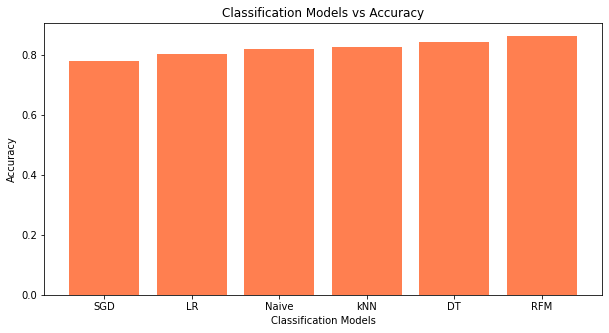

In [28]:
lists = sorted(accuracies.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="coral")
plt.title('Classification Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()

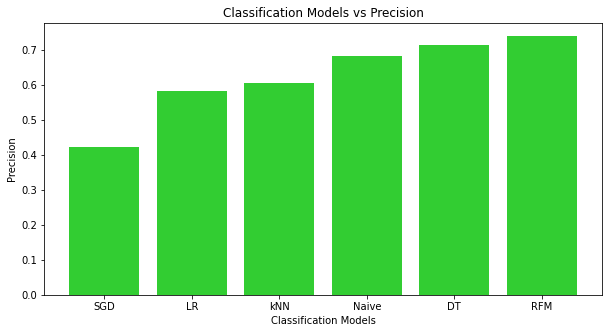

In [29]:
lists = sorted(precisions.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="limegreen")
plt.title('Classification Models vs Precision')
plt.xlabel('Classification Models')
plt.ylabel('Precision')
plt.show()

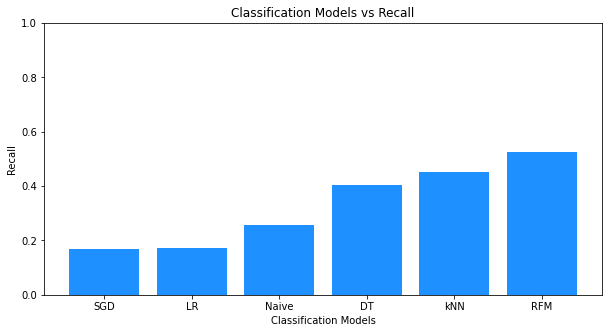

In [30]:
lists = sorted(recalls.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="dodgerblue")
plt.ylim(0,1)
plt.title('Classification Models vs Recall')
plt.xlabel('Classification Models')
plt.ylabel('Recall')
plt.show()

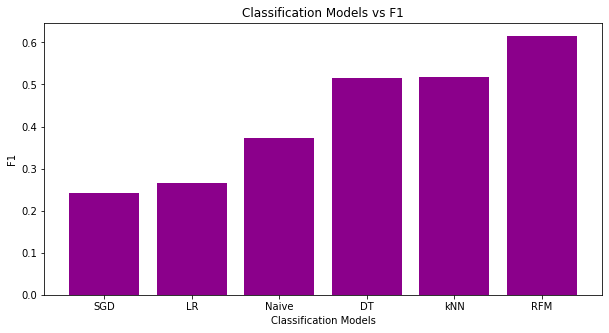

In [31]:
lists = sorted(f1s.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="darkmagenta")
plt.title('Classification Models vs F1')
plt.xlabel('Classification Models')
plt.ylabel('F1')
plt.show()

## 7. Apply Deep Learning Models

### Artificial Neural Networks

In [32]:
ann_model = Sequential()
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=8,activation='relu'))
ann_model.add(Dense(units=1,activation='sigmoid'))
ann_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
ann_model.fit(x_train,y_train,batch_size=32,epochs=100)
acc= ann_model.evaluate(x_train, y_train)
print("ANN Model Accuracy: ")
ann_acc=acc[1]
print(ann_acc*100,"%")

Epoch 1/100
219/219 [==============================] - 3s 3ms/step - loss: 0.5343 - accuracy: 0.7974
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4792 - accuracy: 0.7977
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4474 - accuracy: 0.7977
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.4190 - accuracy: 0.8006
Epoch 5/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.8223
Epoch 6/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8291
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8339
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3828 - accuracy: 0.8379
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 0.8427
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3716 - accura

#### Additional reshaping for CNN and LSTM

In [33]:
x_train = np.random.uniform(0,1, (7000,10))
y_train = np.random.randint(0,2, 7000)

x_train = np.expand_dims(x_train, axis=1)
x_test = np.expand_dims(x_test, axis=1)

### Convolutional Neural Networks

In [34]:
inp = Input(shape=(1,10))
conv2 = Conv1D(filters=128, kernel_size=5, activation='relu', padding='same')(inp)
drop21 = Dropout(0.5)(conv2)
conv22 = Conv1D(filters=64, kernel_size=5, activation='relu', padding='same')(drop21)
drop22 = Dropout(0.5)(conv22)
pool2 = Flatten()(drop22)
out = Dense(2, activation='softmax')(pool2)
cnn_model = Model(inp, out)
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn_model.fit(x_train, y_train, epochs=100)
acc= cnn_model.evaluate(x_train, y_train)
print("CNN Model Accuracy: ")
cnn_acc=acc[1]
print(cnn_acc*100,"%")

Epoch 1/100
219/219 [==============================] - 2s 4ms/step - loss: 0.6946 - accuracy: 0.5009
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5079
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6939 - accuracy: 0.5044
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.5167
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.5186
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5154
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6925 - accuracy: 0.5159
Epoch 8/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5136
Epoch 9/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6923 - accuracy: 0.5160
Epoch 10/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6923 - accura

### Long Short-Term Memory RNN

In [35]:
lstm_model=Sequential()
lstm_model.add(Bidirectional(LSTM(100, return_sequences=False), input_shape=(1, 10)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(lstm_model.summary())
history = lstm_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64)
acc= lstm_model.evaluate(x_train, y_train)
print("LSTM Model Accuracy: ")
lstm_acc=acc[1]
print(lstm_acc*100,"%")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 200)               88800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 201       
Total params: 89,001
Trainable params: 89,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
110/110 [==============================] - 8s 22ms/step - loss: 0.6933 - accuracy: 0.5019 - val_loss: 0.6973 - val_accuracy: 0.4833
Epoch 2/20
110/110 [==============================] - 1s 9ms/step - loss: 0.6925 - accuracy: 0.5117 - val_loss: 0.7067 - val_accuracy: 0.4633
Epoch 3/20
110/110 [==============================] - 1s 9ms/step - loss: 0.6926 - accurac

## 8. DL Model Evaluation

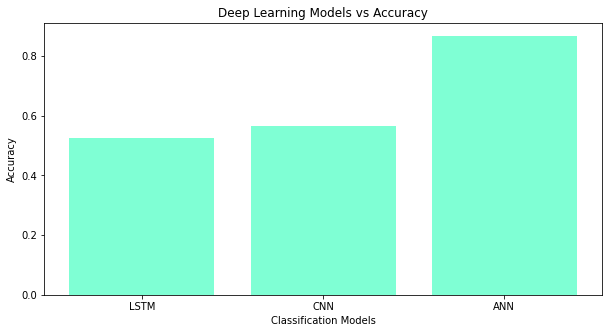

In [36]:
accuracies= {"ANN": ann_acc, 
             "CNN": cnn_acc, 
             "LSTM": lstm_acc, 
             }
lists = sorted(accuracies.items(), key=lambda x: x[1]*100)
plt.figure(figsize=(10,5))
plt.bar(*zip(*lists), color="aquamarine")
plt.title('Deep Learning Models vs Accuracy')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()